# <center>Plot Ridge coefficients as a function of the regularization<center>

显示了共线性对估计系数的影响。

本例中使用的估计器是Ridge回归。每种颜色代表系数向量的不同特征，表现为正则化参数的函数。

这个例子也展示了将Ridge回归应用于高度病态矩阵的有效性。对于这样的矩阵，目标变量的微小变化会导致计算出的权重产生巨大的差异。在这种情况下，设置一定的正则化(alpha)来减少这种变化(噪声)是有用的。

当alpha很大时，正则化效应主导平方损失函数，系数趋于0。在路径的末端，随着alpha趋向于零，解趋向于普通的最小二乘法，系数呈现出巨大的振荡。在实践中，有必要以这样一种方式调整alpha，以便在两者之间保持平衡。

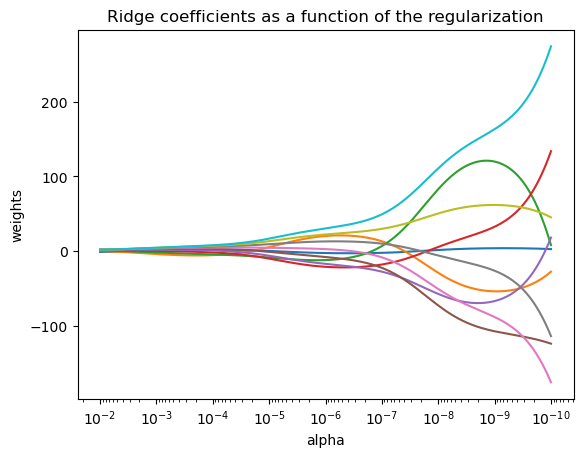

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import linear_model

# X is the 10x10 Hilbert matrix (希尔伯特矩阵)
X = 1.0 / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
# print(X)
y = np.ones(10)

# Compute Paths
n_alphas = 200
# 生成从-10到-2的等比数列，共n_alphas个数
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    # print(ridge.coef_)

# print(coefs)

# Display results
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
# plt.axis("tight")
plt.show()

In [2]:
print(np.arange(1, 11))
print(np.arange(0, 10)[:, np.newaxis])
print(np.ones(10))
# np.logspace(-10, -2, n_alphas)

[ 1  2  3  4  5  6  7  8  9 10]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
